Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [5]:
from itertools import accumulate
import numpy as np
from matplotlib import pyplot as plt


from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [6]:
UNIVERSE_SIZE = 1000
NUM_SETS = 200
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [7]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Helper Functions

In [8]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)

# Improved RHMC

In [9]:
def multiple_mutation_strength(solution: np.ndarray, strength: float = 0.3) -> np.ndarray:
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_sol = np.logical_xor(solution, mask)
    return new_sol

In [10]:
def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

ic| fitness(solution): (np.False_, np.float64(-9859.017105733714))
ic| fitness(solution): (np.True_, np.float64(-6227.711042590245))


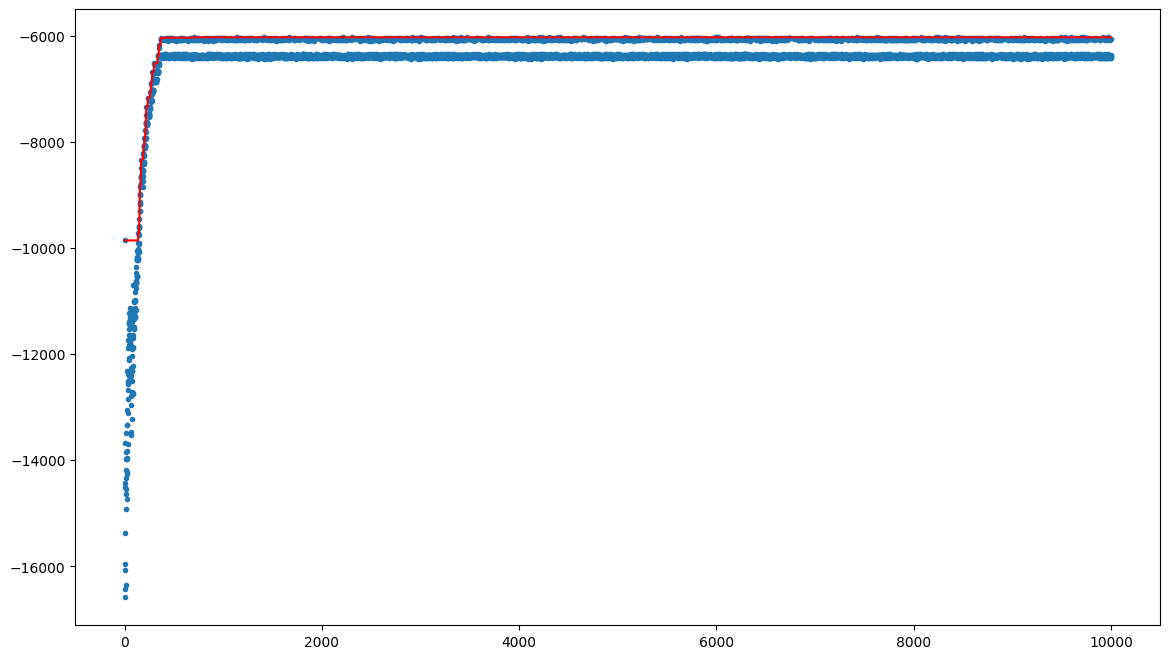

In [15]:
BUFFER_SIZE = 50

solution = rng.random(NUM_SETS) < 0.3
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

strength = 0.5
buffer = list()

for steps in range(10_000):
    new_solution = multiple_mutation_strength(solution, strength)
    f = fitness(new_solution)

    history.append(float(f[1]))
    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]
    if sum(buffer) > 10:
        strength *= 1.1
    elif sum(buffer) < 10:
        strength /= 1.1

    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)

ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")